# Ridge Regression with path coordinates

In [3]:
from pathlib import Path
import os
wd=Path().absolute().parent
os.chdir(wd) #change the working dirctory to parant

In [7]:
from modules.func import *
import matplotlib.pyplot as plt
import numpy as np
# from modules.encoder import l
import pickle
from pathlib import Path
from tqdm import tqdm

all_data_dir=Path('data/alldata/')
datalist=[x for x in all_data_dir.iterdir()]
output_dir=Path("output/data/ridge_regression/")

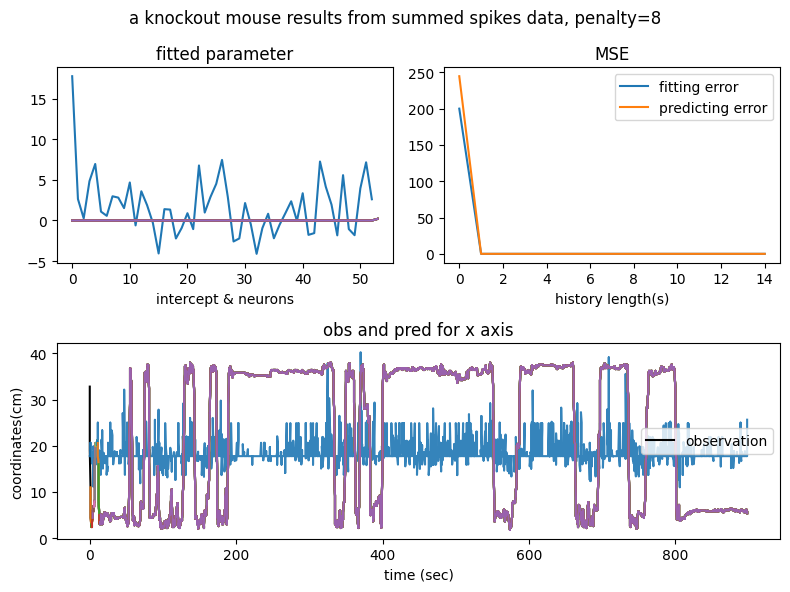

In [24]:
data_name=str(datalist[0]).split('/')[-1]
sample_type = "knockout" if "CaMKII" in data_name else "wild-type"

with open(output_dir/Path(f"rr_past_coord_{data_name}.pickle"),"rb") as f:
    results_all=pickle.load(f) 

plt.figure(figsize=(8,6))
fit_error=[]
pred_error=[]
nthist_list=[]
for result in results_all:
    if np.abs(result["penalty"]-8.0)<.1 and result["coord_axis"]=="x-axis":
        fit_error.append((result["model_smry"]["fitted error"])/25) # the model result didnt divide the coordnates data by 5
        pred_error.append(cal_mse(result['model_smry']["prediction"],result["y_test"])/25)
        nthist_list.append(result["nthist"]/3)

        plt.subplot(221)
        plt.plot(result["model_smry"]["fitted parameter"]/5)
        plt.xlabel("intercept & neurons")
        plt.title("fitted parameter")

        test_length=len(result["y_test"])
        xx=[int(i/3) for i in range(result["nthist"],result["nthist"]+test_length)]
        if result["nthist"]==0:
            plt.subplot(212)
            plt.plot(xx,result["y_test"]/5,c="black",label="observation") # 200->40
            plt.legend()
            plt.title("obs and pred for x axis")
            plt.xlabel("time (sec)")
            plt.ylabel("coordinates(cm)")
        plt.subplot(212)
        plt.plot(xx,result['model_smry']["prediction"]/5,alpha=.9,label="prediction")

plt.subplot(222)
plt.plot(nthist_list,fit_error,label="fitting error")
plt.plot(nthist_list,pred_error,label="predicting error")
plt.title("MSE")
plt.xlabel("history length(s)")
plt.legend()

plt.suptitle(f"a {sample_type} mouse results from summed spikes data, penalty=8")
plt.tight_layout()

In [23]:
len(nthist_list)

9